<a href="https://colab.research.google.com/github/ajinata84/sablon-ml/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pandas numpy scikit-learn

In [12]:
import pandas as pd
import numpy as np
from prophet import Prophet
from datetime import datetime
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('datasetsablonbulanan.csv')

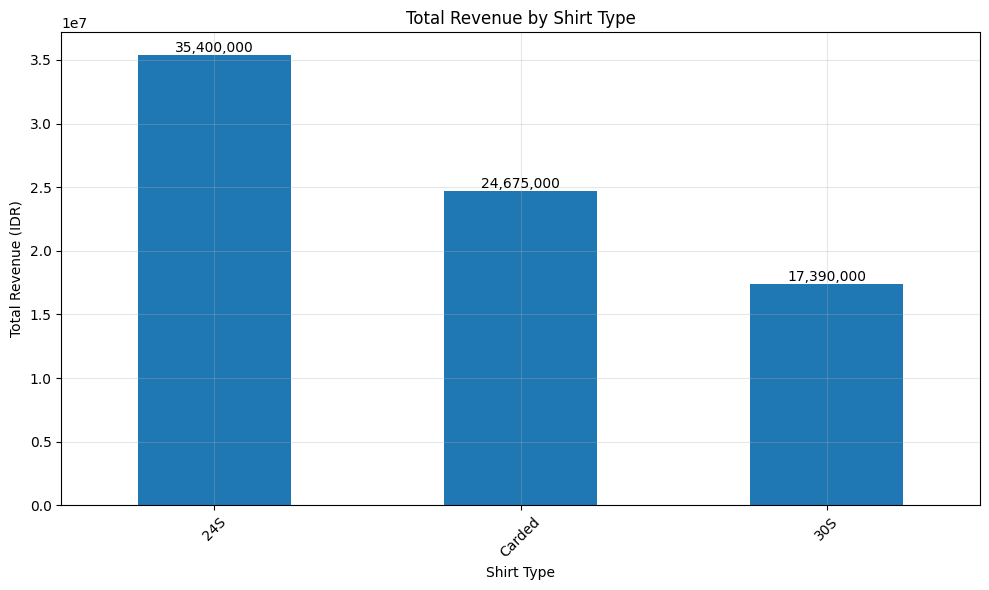

<Figure size 1200x600 with 0 Axes>

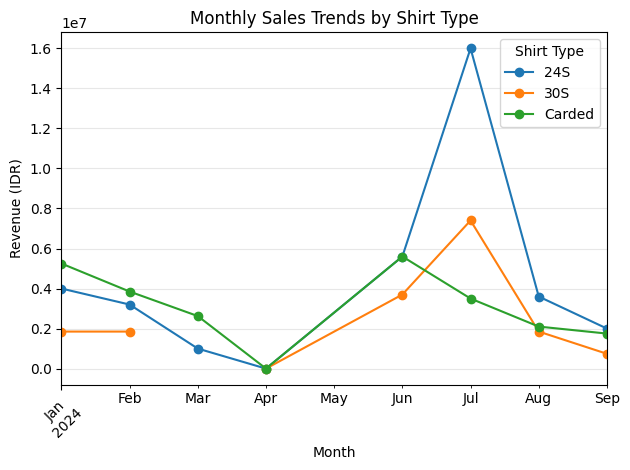

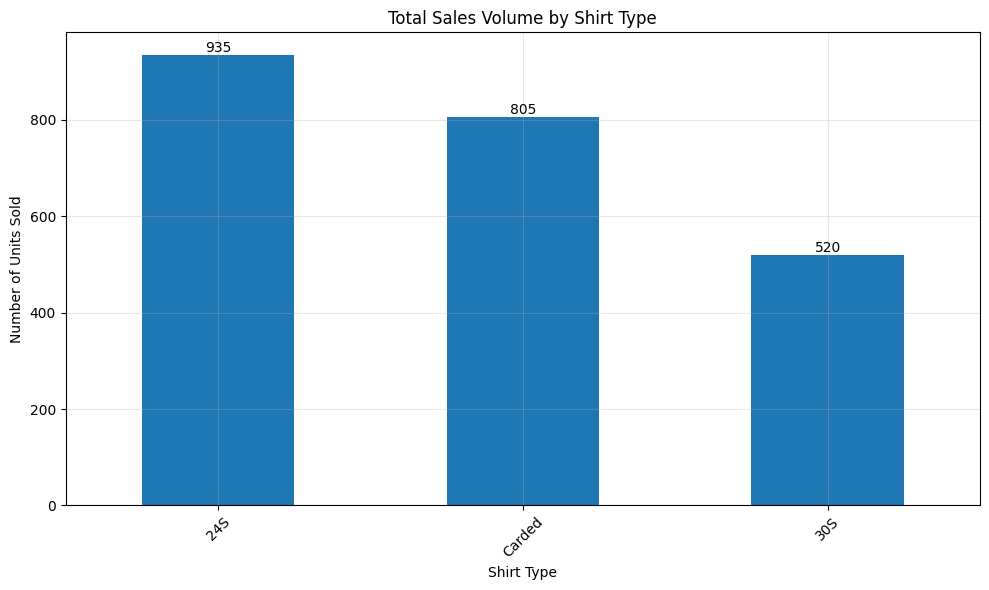


Sales Performance Analysis:
        Total Revenue  Units Sold  Average Price
Baju                                            
24S          35400000         935       37860.96
Carded       24675000         805       30652.17
30S          17390000         520       33442.31


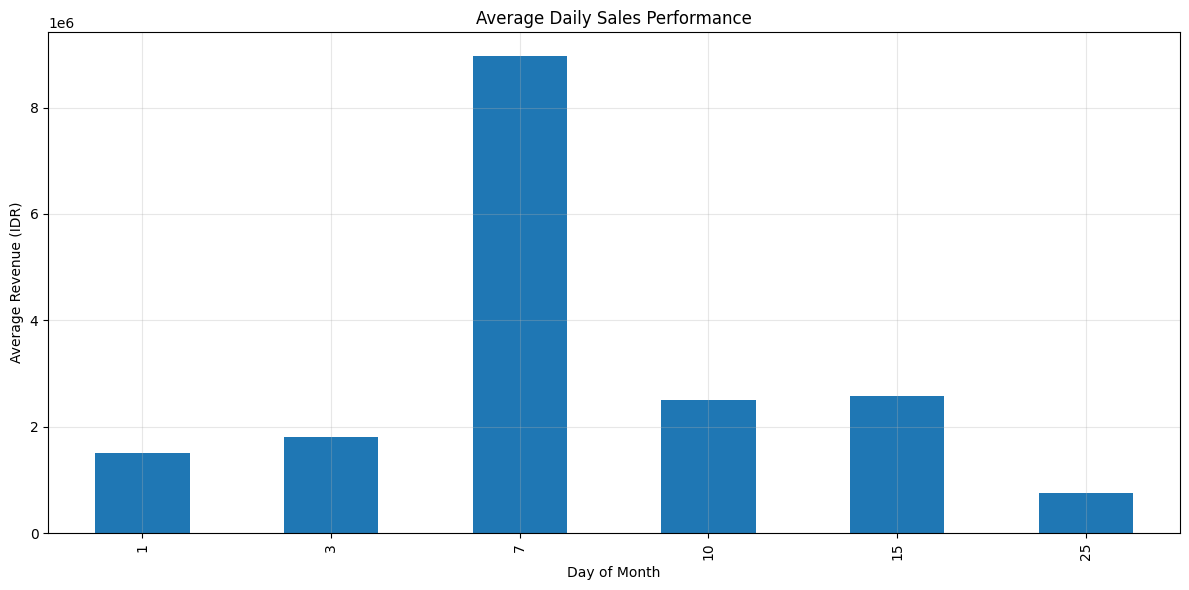


Key Sales Insights:
1. Most Revenue Generating Shirt: 24S (IDR 35,400,000)
2. Most Sold Shirt Type: 24S (935 units)
3. 24S Growth Rate: -50.0%
3. 30S Growth Rate: -60.0%
3. Carded Growth Rate: -66.7%
4. Best Selling Day: Day 7 of the month


In [16]:
def analyze_sales(df):
    df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')
    sales_df = df[df['Tipe'] == 'Cetak'].copy()

    revenue_by_type = sales_df.groupby('Baju')['Pemasukan'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    revenue_by_type.plot(kind='bar')
    plt.title('Total Revenue by Shirt Type')
    plt.xlabel('Shirt Type')
    plt.ylabel('Total Revenue (IDR)')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    for i, v in enumerate(revenue_by_type):
        plt.text(i, v, f'{v:,.0f}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    sales_df['Month'] = sales_df['Tanggal'].dt.to_period('M')
    monthly_sales = sales_df.groupby(['Month', 'Baju'])['Pemasukan'].sum().unstack()

    plt.figure(figsize=(12, 6))
    monthly_sales.plot(marker='o')
    plt.title('Monthly Sales Trends by Shirt Type')
    plt.xlabel('Month')
    plt.ylabel('Revenue (IDR)')
    plt.grid(True, alpha=0.3)
    plt.legend(title='Shirt Type')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    volume_by_type = sales_df.groupby('Baju')['Baju Keluar'].sum().sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    volume_by_type.plot(kind='bar')
    plt.title('Total Sales Volume by Shirt Type')
    plt.xlabel('Shirt Type')
    plt.ylabel('Number of Units Sold')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)
    for i, v in enumerate(volume_by_type):
        plt.text(i, v, f'{int(v)}', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

    performance_metrics = pd.DataFrame({
        'Total Revenue': revenue_by_type,
        'Units Sold': volume_by_type,
        'Average Price': revenue_by_type / volume_by_type
    }).round(2)

    print("\nSales Performance Analysis:")
    print("===========================")
    print(performance_metrics)

    sales_df['Day'] = sales_df['Tanggal'].dt.day
    avg_sales_by_day = sales_df.groupby('Day')['Pemasukan'].mean()

    plt.figure(figsize=(12, 6))
    avg_sales_by_day.plot(kind='bar')
    plt.title('Average Daily Sales Performance')
    plt.xlabel('Day of Month')
    plt.ylabel('Average Revenue (IDR)')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    print("\nKey Sales Insights:")
    print("==================")
    print(f"1. Most Revenue Generating Shirt: {revenue_by_type.index[0]} (IDR {revenue_by_type.iloc[0]:,.0f})")
    print(f"2. Most Sold Shirt Type: {volume_by_type.index[0]} ({int(volume_by_type.iloc[0])} units)")

    first_month = monthly_sales.index[0]
    last_month = monthly_sales.index[-1]
    for shirt in monthly_sales.columns:
        if monthly_sales[shirt].iloc[0] != 0:
            growth = ((monthly_sales[shirt].iloc[-1] - monthly_sales[shirt].iloc[0]) /
                     monthly_sales[shirt].iloc[0] * 100)
            print(f"3. {shirt} Growth Rate: {growth:.1f}%")

    best_day = avg_sales_by_day.idxmax()
    print(f"4. Best Selling Day: Day {best_day} of the month")

analyze_sales(df)

INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7n1ij7v/ii88a50x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7n1ij7v/urbg8_lv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29838', 'data', 'file=/tmp/tmpp7n1ij7v/ii88a50x.json', 'init=/tmp/tmpp7n1ij7v/urbg8_lv.json', 'output', 'file=/tmp/tmpp7n1ij7v/prophet_model6d72vh6a/prophet_model-20241210151734.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:17:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.


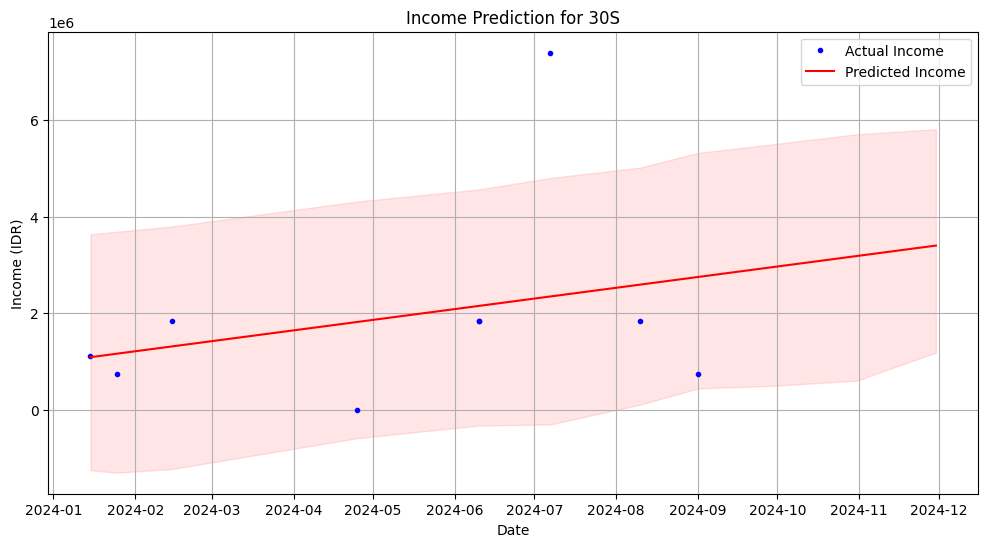

INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7n1ij7v/t55zbav9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7n1ij7v/obychksx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59555', 'data', 'file=/tmp/tmpp7n1ij7v/t55zbav9.json', 'init=/tmp/tmpp7n1ij7v/obychksx.json', 'output', 'file=/tmp/tmpp7n1ij7v/prophet_modelnn25m0ac/prophet_model-20241210151735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Predictions for 30S:
           ds          yhat    yhat_lower    yhat_upper
8  2024-09-30  2.962235e+06  4.988180e+05  5.508153e+06
9  2024-10-31  3.186288e+06  6.028363e+05  5.709903e+06
10 2024-11-30  3.403114e+06  1.185633e+06  5.815010e+06


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


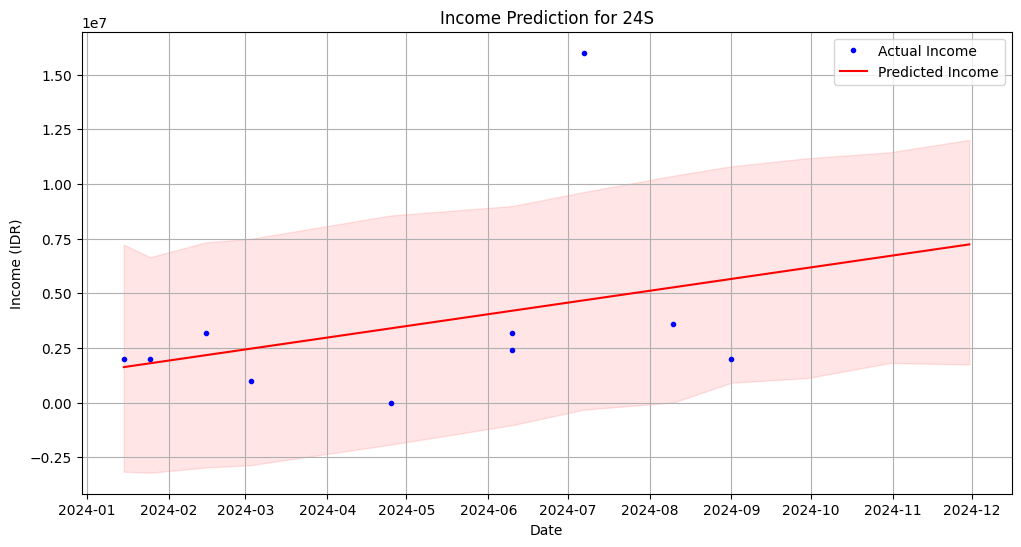

INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7n1ij7v/vlmcu02x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp7n1ij7v/ygkb81c1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22719', 'data', 'file=/tmp/tmpp7n1ij7v/vlmcu02x.json', 'init=/tmp/tmpp7n1ij7v/ygkb81c1.json', 'output', 'file=/tmp/tmpp7n1ij7v/prophet_model1pre2fka/prophet_model-20241210151735.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:17:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:17:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



Predictions for 24S:
           ds          yhat    yhat_lower    yhat_upper
9  2024-09-30  6.165795e+06  1.125854e+06  1.117835e+07
10 2024-10-31  6.709243e+06  1.812261e+06  1.144786e+07
11 2024-11-30  7.235160e+06  1.743897e+06  1.201609e+07


/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


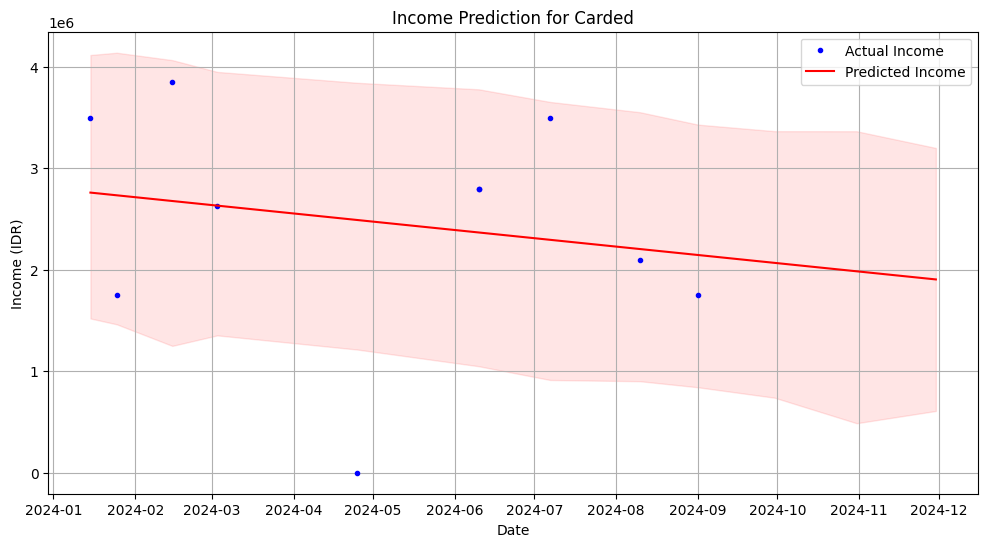


Predictions for Carded:
           ds          yhat     yhat_lower    yhat_upper
9  2024-09-30  2.067871e+06  738997.680975  3.365813e+06
10 2024-10-31  1.984965e+06  487725.802339  3.365260e+06
11 2024-11-30  1.904734e+06  608590.984742  3.200490e+06


In [17]:
df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

types = ['30S', '24S', 'Carded']
predictions = {}

for shirt_type in types:
    mask = (df['Baju'] == shirt_type) & (df['Tipe'] == 'Cetak')
    shirt_data = df[mask][['Tanggal', 'Pemasukan']].copy()

    shirt_data.columns = ['ds', 'y']

    model = Prophet(yearly_seasonality=False,
                   weekly_seasonality=False,
                   daily_seasonality=False)
    model.fit(shirt_data)

    future_dates = model.make_future_dataframe(periods=3, freq='M')

    forecast = model.predict(future_dates)
    predictions[shirt_type] = forecast

    plt.figure(figsize=(12, 6))
    plt.plot(shirt_data['ds'], shirt_data['y'], 'b.', label='Actual Income')
    plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Predicted Income')
    plt.fill_between(forecast['ds'],
                     forecast['yhat_lower'],
                     forecast['yhat_upper'],
                     color='r',
                     alpha=0.1)
    plt.title(f'Income Prediction for {shirt_type}')
    plt.xlabel('Date')
    plt.ylabel('Income (IDR)')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"\nPredictions for {shirt_type}:")
    future_predictions = forecast.tail(3)[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    print(future_predictions)

In [18]:
from scipy.stats import norm

def calculate_optimal_stock(df):
    shirt_types = df['Baju'].unique()

    results = {}

    for shirt in shirt_types:
        shirt_data = df[df['Baju'] == shirt]

        avg_demand = shirt_data[shirt_data['Tipe'] == 'Cetak']['Baju Keluar'].mean()
        std_demand = shirt_data[shirt_data['Tipe'] == 'Cetak']['Baju Keluar'].std()

        holding_cost = shirt_data[shirt_data['Tipe'] == 'Pembelian']['Nominal Satuan'].iloc[0] * 0.1
        stockout_cost = shirt_data[shirt_data['Tipe'] == 'Cetak']['Nominal Satuan'].iloc[0] * 0.2

        z_score = norm.ppf(0.95)
        safety_stock = z_score * std_demand

        lead_time = 7
        lead_time_demand = (avg_demand * lead_time) / 30
        reorder_point = lead_time_demand + safety_stock

        annual_demand = avg_demand * 12
        order_cost = 100000
        eoq = np.sqrt((2 * annual_demand * order_cost) / holding_cost)

        results[shirt] = {
            'Average Monthly Demand': round(avg_demand, 2),
            'Safety Stock': round(safety_stock, 2),
            'Reorder Point': round(reorder_point, 2),
            'Economic Order Quantity': round(eoq, 2)
        }

    return results

df['Tanggal'] = pd.to_datetime(df['Tanggal'], format='%d/%m/%Y')

optimization_results = calculate_optimal_stock(df)

print("\nStock Optimization Results:")
print("==========================")
for shirt, metrics in optimization_results.items():
    print(f"\nShirt Type: {shirt}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")

current_stock = df.groupby('Baju')['Total Stok Baju'].last()

print("\nCurrent Stock Levels:")
print("====================")
for shirt in current_stock.index:
    print(f"{shirt}: {current_stock[shirt]} units")
    if current_stock[shirt] <= optimization_results[shirt]['Reorder Point']:
        print(f"⚠️ Stock level below reorder point! Consider ordering {optimization_results[shirt]['Economic Order Quantity']} units")


Stock Optimization Results:

Shirt Type: 30S
Average Monthly Demand: 57.78
Safety Stock: 90.38
Reorder Point: 103.87
Economic Order Quantity: 214.99

Shirt Type: 24S
Average Monthly Demand: 93.5
Safety Stock: 179.94
Reorder Point: 201.75
Economic Order Quantity: 260.77

Shirt Type: Carded
Average Monthly Demand: 80.5
Safety Stock: 36.05
Reorder Point: 54.83
Economic Order Quantity: 262.68

Current Stock Levels:
24S: 80 units
⚠️ Stock level below reorder point! Consider ordering 260.77 units
30S: 90 units
⚠️ Stock level below reorder point! Consider ordering 214.99 units
Carded: 35 units
⚠️ Stock level below reorder point! Consider ordering 262.68 units
